### Matplotlib

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
matches_df = pd.read_csv('matches.csv')
matches_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
1,2,2008,Chandigarh,2008-04-19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN
2,3,2008,Delhi,2008-04-19,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN
3,4,2008,Mumbai,2008-04-20,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,NaN
4,5,2008,Kolkata,2008-04-20,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,NaN


In [6]:
matches_df.player_of_match.value_counts()

CH Gayle          17
YK Pathan         16
AB de Villiers    15
DA Warner         14
RG Sharma         13
                  ..
AD Mascarenhas     1
A Singh            1
CL White           1
KM Jadhav          1
SP Goswami         1
Name: player_of_match, Length: 187, dtype: int64

/Users/vverdhan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


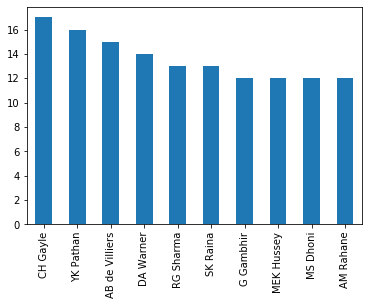

In [7]:
matches_df.player_of_match.value_counts()[:10].plot('bar')

### Types of plots


In [8]:
deliveries_df = pd.read_csv('deliveries.csv')
deliveries_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,1,SC Ganguly,BB McCullum,P Kumar,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
1,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,2,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,3,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN
3,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,4,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,5,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


#### Line plot

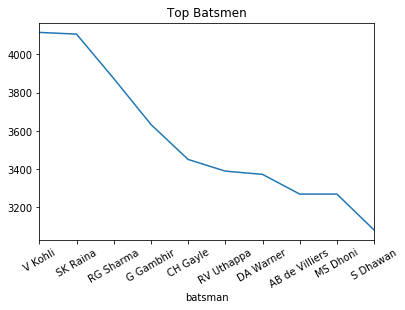

In [9]:
batsman_runs = deliveries_df.groupby(['batsman']).batsman_runs.sum().nlargest(10)
batsman_runs.plot(title = 'Top Batsmen', rot = 30)

#### Bar chart

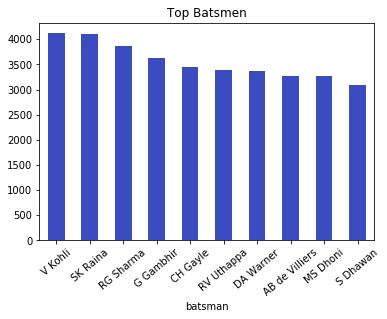

In [10]:
deliveries_df.groupby(['batsman']).batsman_runs.sum().nlargest(10)\
.plot(kind = 'bar',title = 'Top Batsmen', rot = 40, colormap = 'coolwarm')

#### Bar plot of batsmen's total score in 2015 vs 2016

In [11]:
ipl = matches_df[['id', 'season']].merge(deliveries_df, left_on = 'id', right_on = 'match_id').drop('match_id', axis = 1)
runs_comparison = ipl[ipl.season.isin([2015, 2016])].groupby(['season', 'batsman']).batsman_runs.sum().nlargest(20).reset_index().sort_values(by='batsman')
vc = runs_comparison.batsman.value_counts()
batsmen_comparison_df = runs_comparison[runs_comparison.batsman.isin(vc[vc == 2].index.tolist())]
batsmen_comparison_df

,season,batsman,batsman_runs
2,2016,AB de Villiers,687
6,2015,AB de Villiers,513
4,2015,AM Rahane,540
13,2016,AM Rahane,480
1,2016,DA Warner,848
3,2015,DA Warner,562
11,2016,RG Sharma,489
12,2015,RG Sharma,482
7,2015,V Kohli,505
0,2016,V Kohli,973


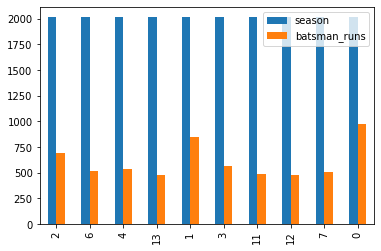

In [12]:
batsmen_comparison_df.plot.bar()

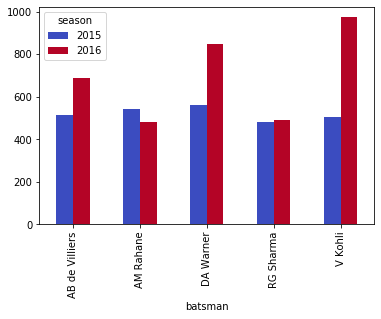

In [13]:
batsmen_comparison_df.pivot('batsman', 'season', 'batsman_runs').plot(kind = 'bar', colormap = 'coolwarm')

#### Pie Chart

In [14]:
match_winners = matches_df.winner.value_counts()
match_winners

Mumbai Indians                 80
Chennai Super Kings            79
Royal Challengers Bangalore    70
Kolkata Knight Riders          68
Kings XI Punjab                63
Rajasthan Royals               63
Delhi Daredevils               56
Sunrisers Hyderabad            34
Deccan Chargers                29
Pune Warriors                  12
Gujarat Lions                   9
Kochi Tuskers Kerala            6
Rising Pune Supergiants         5
Name: winner, dtype: int64

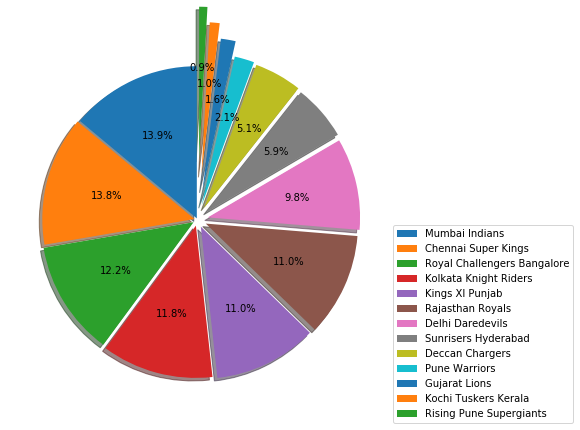

In [15]:
fig, ax = plt.subplots(figsize=(8,7))
explode = (0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.2,0.3,0.4)
ax.pie(match_winners, labels = None, autopct='%1.1f%%', startangle=90, shadow = True, explode = explode)
ax.legend(bbox_to_anchor=(1,0.5), labels=match_winners.index)

#### Histogram

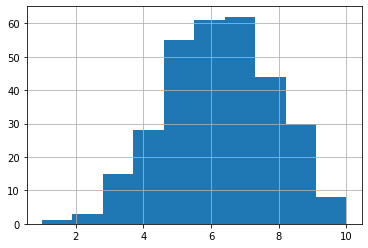

In [18]:
matches_df[matches_df.win_by_wickets != 0].win_by_wickets.hist()

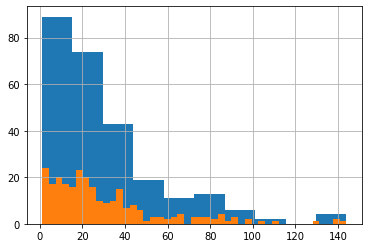

In [19]:
matches_df[matches_df.win_by_runs != 0].win_by_runs.hist()

matches_df[matches_df.win_by_runs != 0].win_by_runs.hist(bins=45) #default value bins = 10

#### Box plots

In [20]:
team_score = deliveries_df.groupby(['match_id', 'batting_team']).total_runs.sum().reset_index()

top_teams = deliveries_df.groupby('batting_team').total_runs.sum().nlargest(5).reset_index().batting_team.tolist()
top_teams_df = team_score[team_score.batting_team.isin(top_teams)]


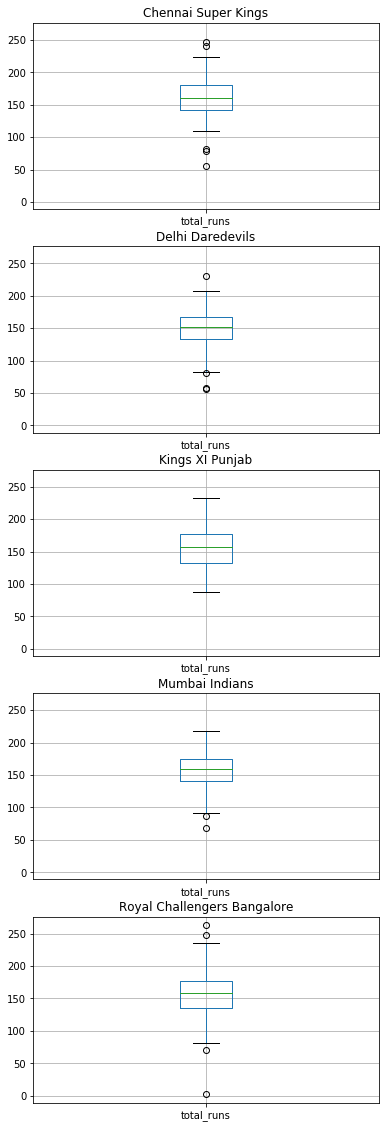

In [21]:
top_teams_df.groupby('batting_team').boxplot(column = 'total_runs', layout=(5,1),figsize=(6,20));

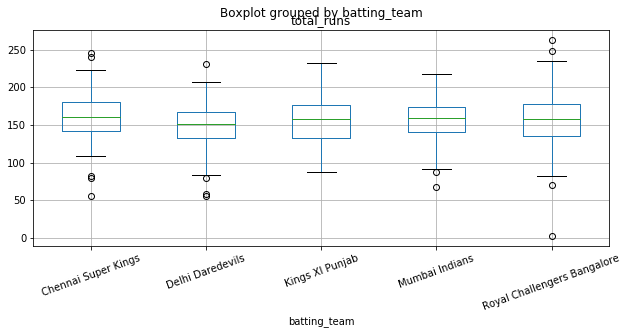

In [22]:
top_teams_df.boxplot( column = 'total_runs',by = 'batting_team', rot = 20, figsize = (10,4));

#### Scatter plot

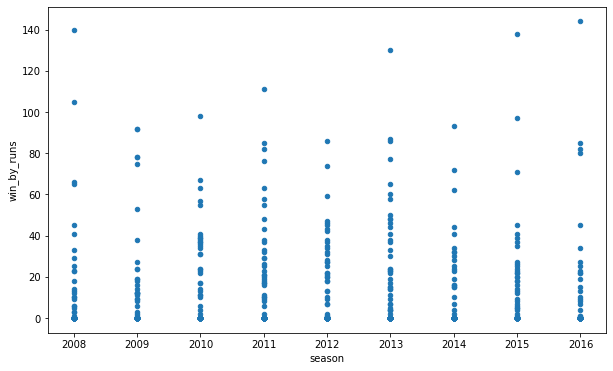

In [23]:
matches_df.plot(kind='scatter', x = 'season', y = 'win_by_runs', figsize=(10,6))

In [24]:
batsmen_comparison_df

,season,batsman,batsman_runs
2,2016,AB de Villiers,687
6,2015,AB de Villiers,513
4,2015,AM Rahane,540
13,2016,AM Rahane,480
1,2016,DA Warner,848
3,2015,DA Warner,562
11,2016,RG Sharma,489
12,2015,RG Sharma,482
7,2015,V Kohli,505
0,2016,V Kohli,973


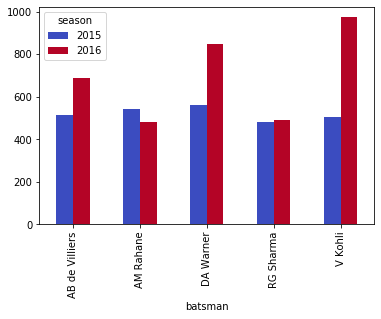

In [25]:
batsmen_comparison_df.pivot('batsman', 'season', 'batsman_runs').plot(kind = 'bar', colormap = 'coolwarm')

In [27]:
import seaborn as sns

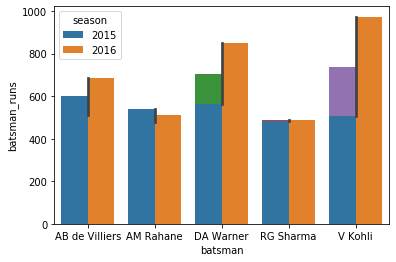

In [28]:
sns.barplot(x = 'batsman', y = 'batsman_runs',data = batsmen_comparison_df)
sns.barplot(x = 'batsman', y = 'batsman_runs', hue = 'season',data = batsmen_comparison_df)

### Countplot

#### Create barplot with number of matches won by each team in dataframe matches.


In [29]:
matches_df.winner.value_counts().reset_index()

,index,winner
0,Mumbai Indians,80
1,Chennai Super Kings,79
2,Royal Challengers Bangalore,70
3,Kolkata Knight Riders,68
4,Kings XI Punjab,63
5,Rajasthan Royals,63
6,Delhi Daredevils,56
7,Sunrisers Hyderabad,34
8,Deccan Chargers,29
9,Pune Warriors,12


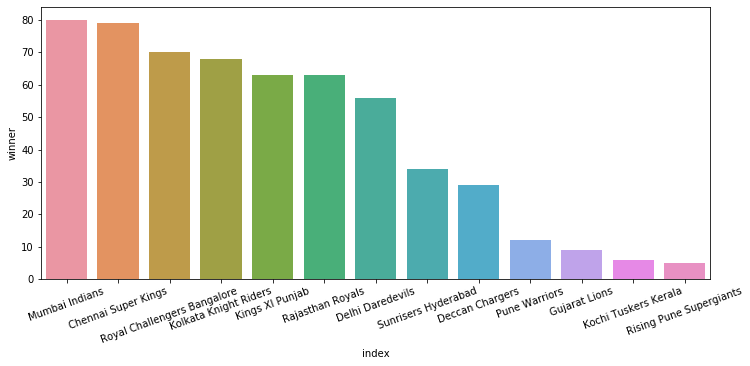

In [30]:
fig, ax = plt.subplots(figsize=(12,5))
sns.barplot(x = 'index', y = 'winner', data = matches_df.winner.value_counts().reset_index())
plt.xticks(rotation=20);

### Boxplot

Distribution of runs made by top 5 teams throughout ipl

In [77]:
team_score = deliveries_df.groupby(['match_id', 'inning','batting_team']).total_runs.sum().reset_index()
top_teams = deliveries_df.groupby('batting_team').total_runs.sum().nlargest(5).reset_index().batting_team.tolist()
top_teams_df = team_score[team_score.batting_team.isin(top_teams)]
top_teams_df = top_teams_df[top_teams_df.inning.isin([1,2])]
top_teams_df.head()

,match_id,inning,batting_team,total_runs
1,1,2,Royal Challengers Bangalore,82
2,2,1,Chennai Super Kings,240
3,2,2,Kings XI Punjab,207
5,3,2,Delhi Daredevils,132
6,4,1,Mumbai Indians,165


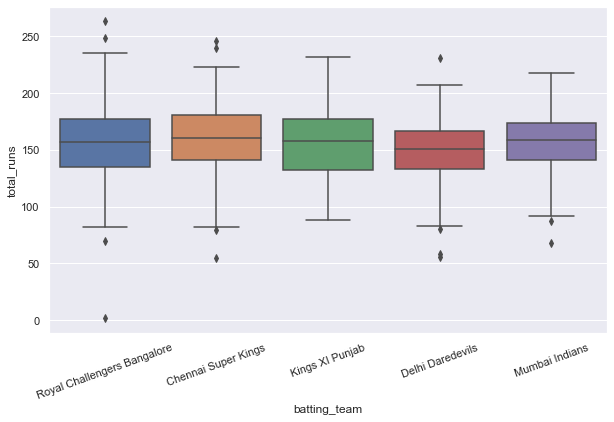

In [78]:
plt.figure(figsize=(10,6))
g = sns.boxplot(y='total_runs', x='batting_team', data = top_teams_df)
g.set_xticklabels(g.get_xticklabels(),rotation=20);

#### boxplot with hue

### Plotting univariate distributions
#### Histogram

distplot(): Used to take a quick look at a univariate distribution. By default, this will draw a histogram and fit a kernel density estimate (KDE).


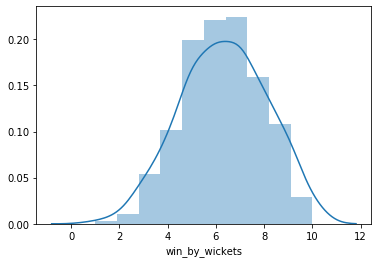

In [31]:
sns.distplot(matches_df[matches_df['win_by_wickets'] != 0].win_by_wickets, bins = 10)

#### Remove the density curve and add a rug plot

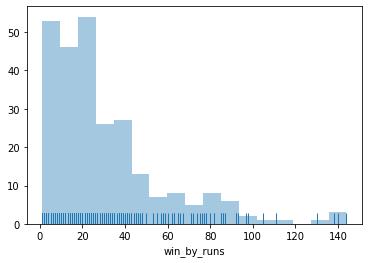

In [32]:
sns.distplot(matches_df[matches_df['win_by_runs'] != 0].win_by_runs, kde=False, rug=True)

#### Kernel density estimation

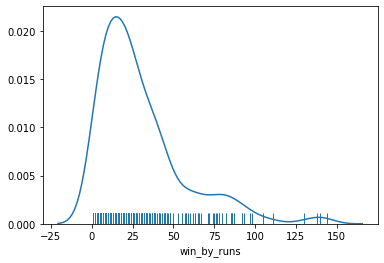

In [33]:
sns.distplot(matches_df[matches_df['win_by_runs'] != 0].win_by_runs, hist=False, rug=True)

### Visualizing linear relationships


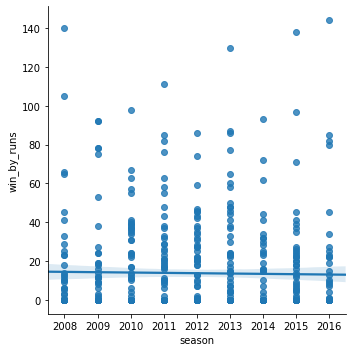

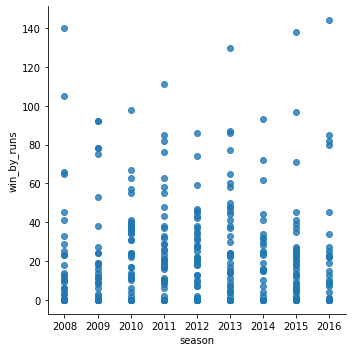

In [34]:
sns.lmplot(x='season', y='win_by_runs', data=matches_df)

sns.lmplot(x='season', y='win_by_runs', fit_reg=False, data=matches_df)

### Visualizing pairwise relationships in a dataset

In [2]:
import seaborn as sns

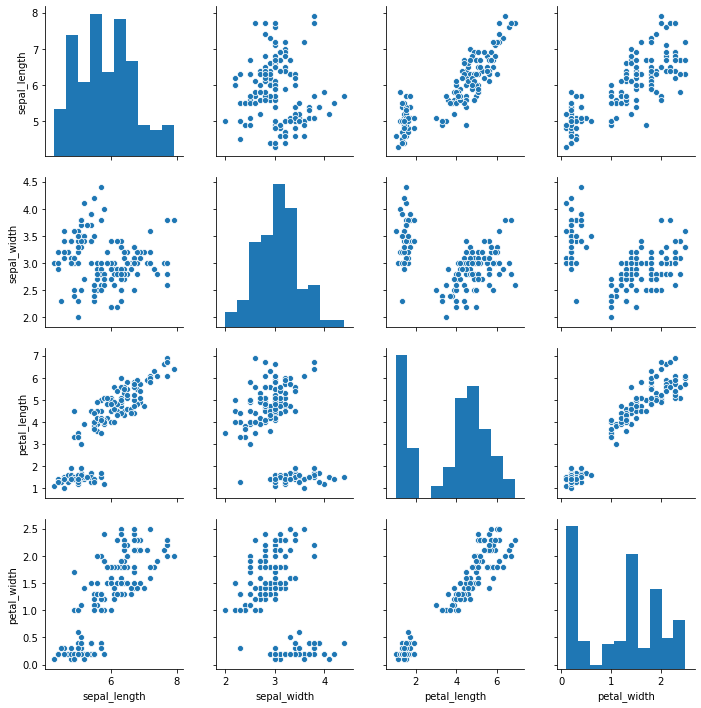

In [38]:
iris = sns.load_dataset("iris")
sns.pairplot(iris);

In [4]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### Heatmap

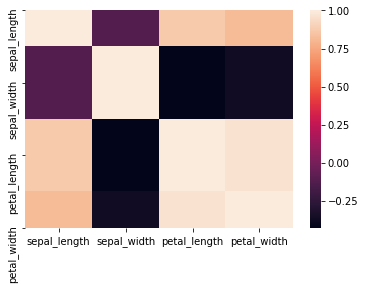

In [39]:
sns.heatmap(iris.corr());

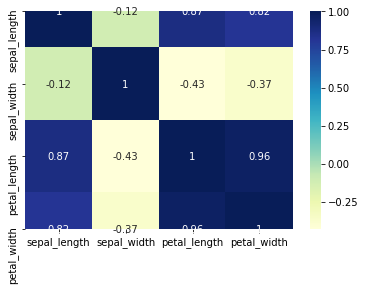

In [40]:
sns.heatmap(iris.corr(),annot = True,cmap="YlGnBu");